# Step-1: Data loading and cleaning

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eergy-efficiency-dataset/ENB2012_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/eergy-efficiency-dataset/ENB2012_data.csv')

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.shape

(768, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [7]:
df.rename(columns ={
    'X1': 'Relative_Compactness', 
    'X2': 'Surface_Area' , 
    'X3': 'Wall_Area',
    'X4': 'Roof_Area', 
    'X5': 'Overall_Height', 
    'X6': 'Orientation', 
    'X7': 'Glazing_Area', 
    'X8': 'Glazing_Area_Distribution', 
    'Y1': 'Heating_Load', 
    'Y2': 'Cooling_Load'
}, inplace=True)


* Relative_Compactness: A measure of how compact the building shape is, potentially affecting energy efficiency.
* Surface_Area: Total exterior surface area of the building, in square units.
* Wall_Area: Area covered by walls, in square units.
* Roof_Area: Area of the roof, in square units.Overall_Height: Height of the building, in units.
* Orientation: Direction the building faces, coded as integers (e.g., 2, 3, 4, 5).
* Glazing_Area: Area covered by glass windows, as a fraction of the overall building surface.
* Glazing_Area_Distribution: Distribution of the glazing area, coded as integers (e.g., 0).
* Heating_Load: Energy required for heating, in appropriate units (e.g., kWh/m²).
* Cooling_Load: Energy required for cooling, in appropriate units (e.g., kWh/m²).


In [8]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

# Step-2:Data Exploration

## Exploring Wall Area with Output Feature

#### Distribution of wall area with respect to Heating_Load 

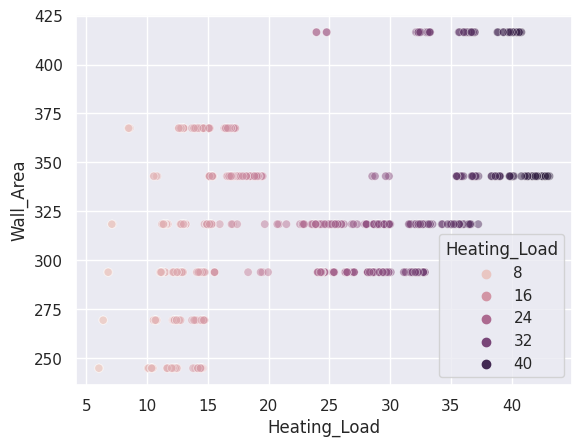

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="darkgrid")
# use the scatterplot function to build the bubble map
sns.scatterplot(
    data=df,
    x="Heating_Load",
    y="Wall_Area",
    hue="Heating_Load",
    alpha=0.5,
    legend=True,
    sizes=(200, 600)
)

# show the graph
plt.show()

* There might be a relationship between Wall_Area and Heating_Load, where larger walls could contribute to higher heating demands.
* The horizontal clusters suggest that the dataset might have been grouped or measured in specific Wall_Area intervals, rather than continuously.

### Value counts of Wall Area

In [11]:
df['Wall_Area'].value_counts()

Wall_Area
294.0    192
318.5    192
343.0    128
416.5     64
245.0     64
269.5     64
367.5     64
Name: count, dtype: int64

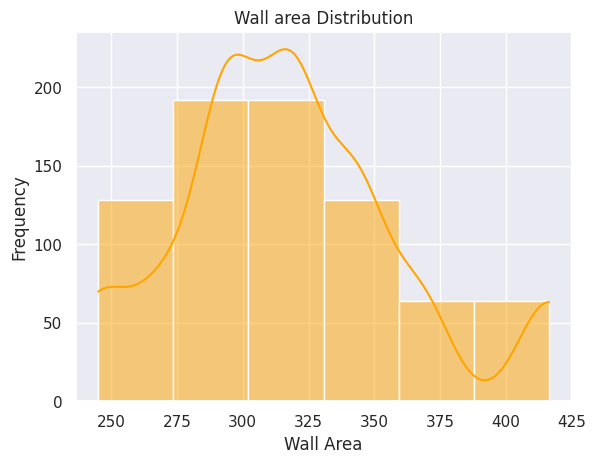

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Distribution plot
sns.histplot(df['Wall_Area'], kde=True, bins=6, color='orange')
plt.title('Wall area Distribution')
plt.xlabel('Wall Area')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Cooling_Load', ylabel='Wall_Area'>

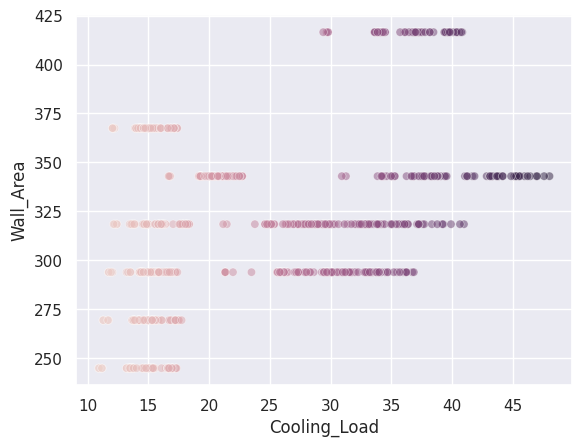

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="darkgrid")
# use the scatterplot function to build the bubble map
sns.scatterplot(
    data=df,
    x="Cooling_Load",
    y="Wall_Area",
    hue="Cooling_Load",
    alpha=0.5,
    legend=False,
    sizes=(200, 600)
)



## Exploring Heating Load

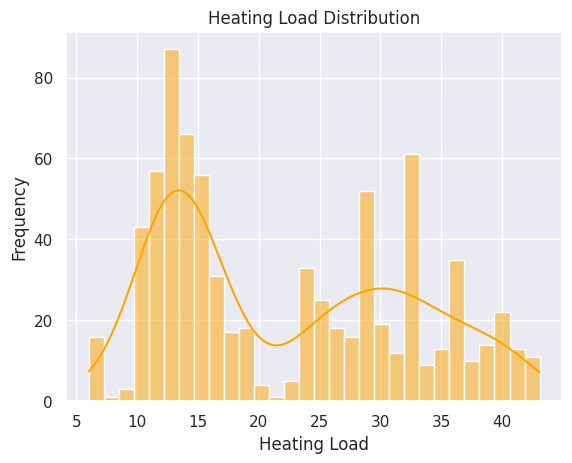

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Distribution plot
sns.histplot(df['Heating_Load'], kde=True, bins=30, color='orange')
plt.title('Heating Load Distribution')
plt.xlabel('Heating Load')
plt.ylabel('Frequency')
plt.show()

* Distribution Shape:

    * The distribution appears bimodal, with two distinct peaks:

    * The first peak is around a heating load of 15.

    * The second peak is between 30 and 35.

    * This suggests the dataset may include two distinct groups of buildings with different heating efficiency characteristics.

* Skewness:

    * The data is slightly right-skewed, with most buildings having heating loads between 10 and 20, while higher heating loads (above 35) are less common.

* Range:

    * The heating load spans approximately from 5 to 45, with the majority concentrated in the range 10–35.

* Density:

    * The highest density is observed around 15, indicating that many buildings have relatively low heating load requirements.

* Tail Behavior:

    * The right tail (above 35) gradually decreases, indicating that buildings with very high heating loads are rare but do exist.

## Exploring Cooling Load

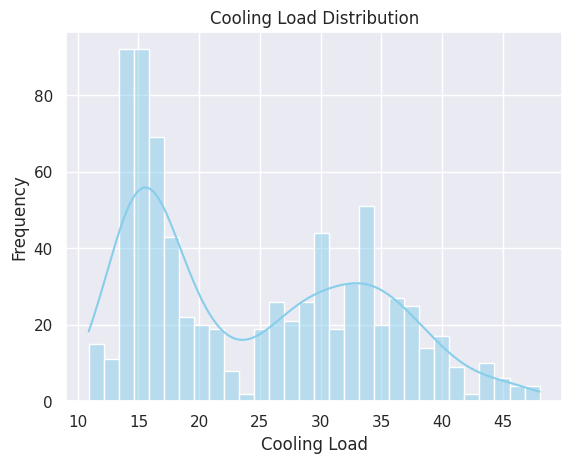

In [15]:
import matplotlib.pyplot as plt

import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Distribution plot

sns.histplot(df['Cooling_Load'], kde=True, bins=30, color='skyblue')

plt.title('Cooling Load Distribution')

plt.xlabel('Cooling Load')

plt.ylabel('Frequency')

plt.show()

* Skewed Distribution:

    * The distribution is slightly right-skewed, indicating that most buildings in the dataset have lower cooling loads (around 15–25).

    * Higher cooling loads (above 30) are less frequent, with very few buildings having loads above 40.

* Modes:

    * There appear to be multiple peaks in the distribution, suggesting the presence of distinct clusters or groups in the dataset.

    * This might reflect differences in building characteristics (e.g., relative compactness, wall area, glazing area).

* Range:

    * The Cooling Load spans approximately from 10 to 45, with the majority concentrated between 15 and 30.

* Density:

    * The highest density of data points lies in the range of 15–20, indicating that many buildings are optimized for lower cooling loads.

* Tail Behavior:

    * The right tail of the distribution shows a gradual decline, suggesting that extreme cooling loads are rare.

## Identifying correlation between other features

<Axes: >

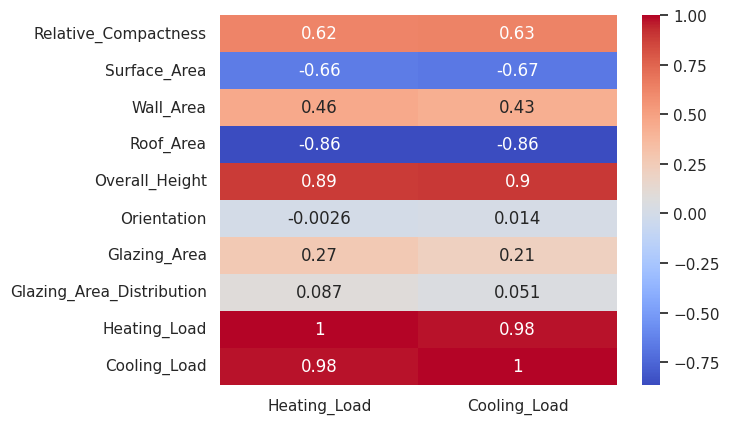

In [16]:
import matplotlib.pyplot as plt

import seaborn as sns

correlation = df.corr()[['Heating_Load','Cooling_Load']]

sns.heatmap(correlation, annot=True, cmap='coolwarm')

## Grouping Heating and Cooling Classes

In [17]:
# Define groups for Heating_Load

def classify_heating(value):

    if value <= 20:

        return 0  # Low

    elif value <= 30:

        return 1  # Medium

    else:

        return 2  # High



# Define groups for Cooling_Load

def classify_cooling(value):

    if value <= 20:

        return 0  # Low

    elif value <= 30:

        return 1  # Medium

    else:

        return 2  # High



# Apply to the dataset

df['Heating_Class'] = df['Heating_Load'].apply(classify_heating)

df['Cooling_Class'] = df['Cooling_Load'].apply(classify_cooling)



# Display the updated dataset

print(df[['Heating_Load', 'Heating_Class', 'Cooling_Load', 'Cooling_Class']].head())


   Heating_Load  Heating_Class  Cooling_Load  Cooling_Class
0         15.55              0         21.33              1
1         15.55              0         21.33              1
2         15.55              0         21.33              1
3         15.55              0         21.33              1
4         20.84              1         28.28              1


In [18]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Heating_Class,Cooling_Class
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760,0.744792,0.877604
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306,0.845248,0.877426
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000,0.000000,0.000000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000,0.000000,0.000000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000,0.000000,1.000000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500,2.000000,2.000000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000,2.000000,2.000000


In [19]:
result = round(df.groupby('Heating_Class')['Heating_Load'].agg(['mean', 'max', 'min','count']),2)
print(result)


                mean    max    min  count
Heating_Class                            
0              13.47  19.95   6.01    397
1              26.82  30.00  20.71    170
2              35.94  43.10  30.05    201


In [20]:
result = round(df.groupby('Cooling_Class')['Cooling_Load'].agg(['mean', 'max', 'min','count']),2)
print(result)

                mean    max    min  count
Cooling_Class                            
0              15.54  19.90  10.90    348
1              25.98  30.00  20.01    166
2              36.07  48.03  30.02    254


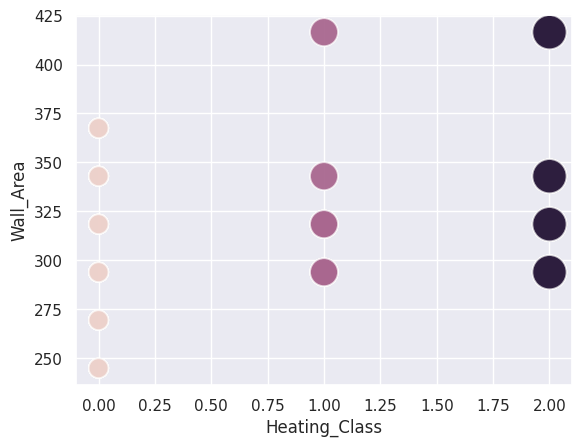

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="darkgrid")
# use the scatterplot function to build the bubble map
sns.scatterplot(
    data=df,
    x="Heating_Class",
    y="Wall_Area",
    hue="Heating_Class",
    size="Heating_Class",
    alpha=0.5,
    legend=False,
    sizes=(200, 600)
)

# show the graph
plt.show()

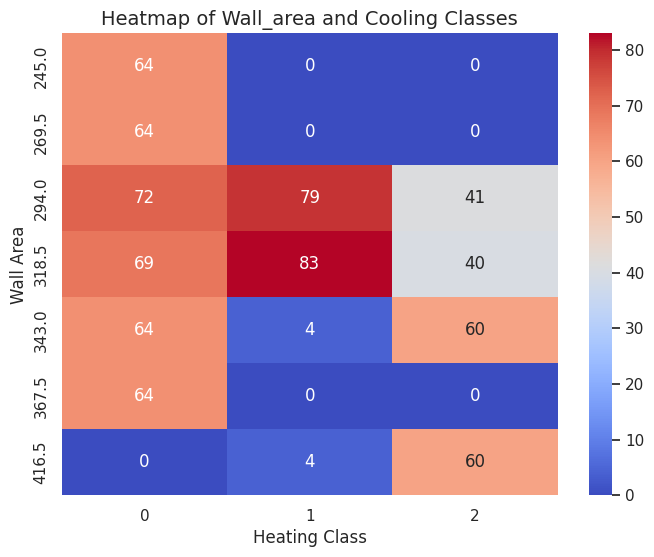

In [22]:
# Heatmap of Heating_Class and Cooling_Class distribution

heatmap_data = df.groupby([ 'Wall_Area','Heating_Class',]).size().unstack(fill_value=0)



plt.figure(figsize=(8, 6))

sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", cbar=True)

plt.title("Heatmap of Wall_area and Cooling Classes", fontsize=14)

plt.xlabel("Heating Class")

plt.ylabel("Wall Area")

plt.show()

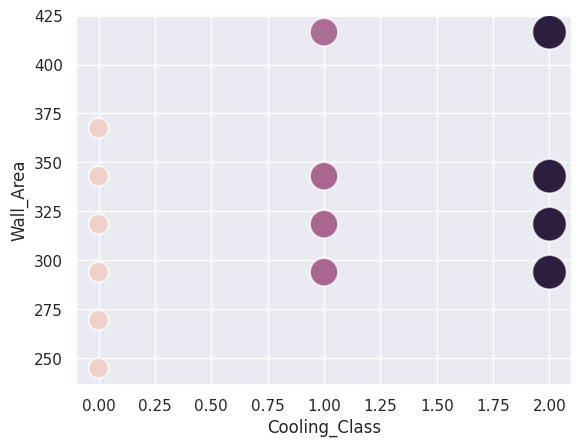

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="darkgrid")
# use the scatterplot function to build the bubble map
sns.scatterplot(
    data=df,
    x="Cooling_Class",
    y="Wall_Area",
    hue="Cooling_Class",
    size="Cooling_Class",
    alpha=0.5,
    legend=False,
    sizes=(200, 600)
)

# show the graph
plt.show()

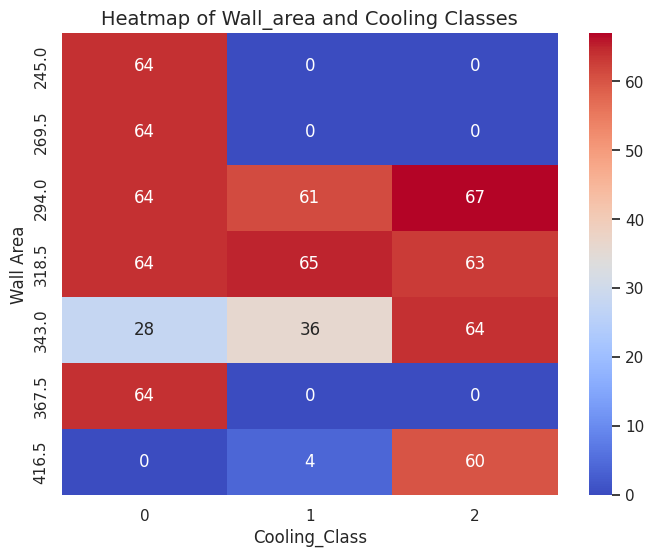

In [24]:
# Heatmap of Heating_Class and Cooling_Class distribution

heatmap_data = df.groupby([ 'Wall_Area','Cooling_Class',]).size().unstack(fill_value=0)



plt.figure(figsize=(8, 6))

sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", cbar=True)

plt.title("Heatmap of Wall_area and Cooling Classes", fontsize=14)

plt.xlabel("Cooling_Class")

plt.ylabel("Wall Area")

plt.show()

# Analysis of classification - Heating load Vs. Cooling Load

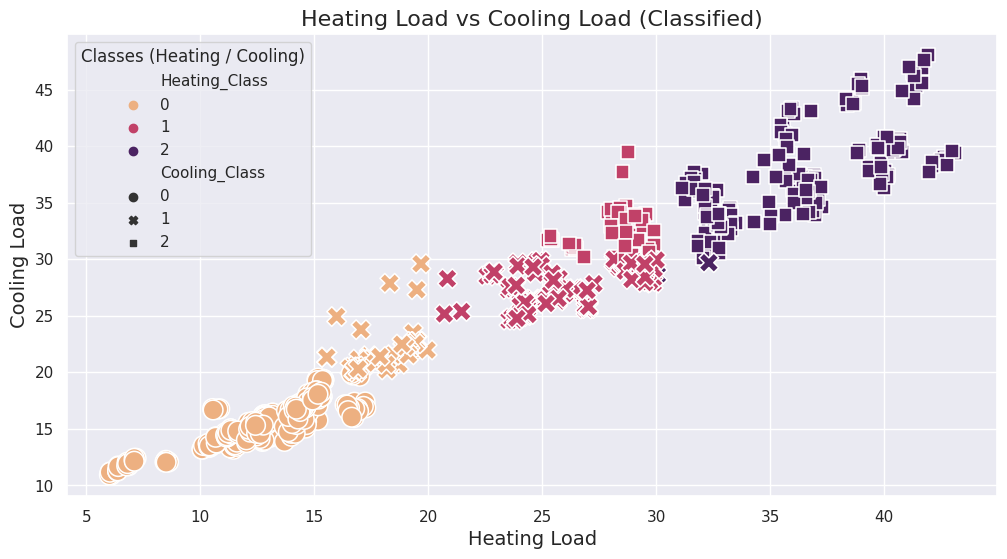

In [25]:
import matplotlib.pyplot as plt

import seaborn as sns


# Scatter plot with Heating_Class and Cooling_Class as hue

plt.figure(figsize=(12,6))

sns.scatterplot(

    data=df,

    x="Heating_Load",

    y="Cooling_Load",

    hue="Heating_Class",

    style="Cooling_Class",

    palette="flare",
    
    s=200

)

plt.title("Heating Load vs Cooling Load (Classified)", fontsize=16)

plt.xlabel("Heating Load",fontsize=14)

plt.ylabel("Cooling Load",fontsize=14)

plt.legend(title="Classes (Heating / Cooling)", loc="upper left")

plt.show()



* There is a strong positive correlation between Heating_Load and Cooling_Load.
* The data is well-separated into three Heating_Class groups (0, 1, 2) and three Cooling_Class groups (0, 1, 2).
* Buildings in Heating_Class 0 (low heating load) tend to also fall under Cooling_Class 0 or Cooling_Class 1.
* Higher heating load (Heating_Class 2) corresponds mostly to higher cooling load (Cooling_Cla
ng_Class 2).

Patterns:

* The separation between classes indicates that the classification criteria (thresholds for heating and cooling) effectively group the data into meaningful categories.

* The Cooling_Class variations (indicated by different shapes) are visible across the heating classes, showing additional granularity.


## Average Heating Load by Heating and Cooling Classes

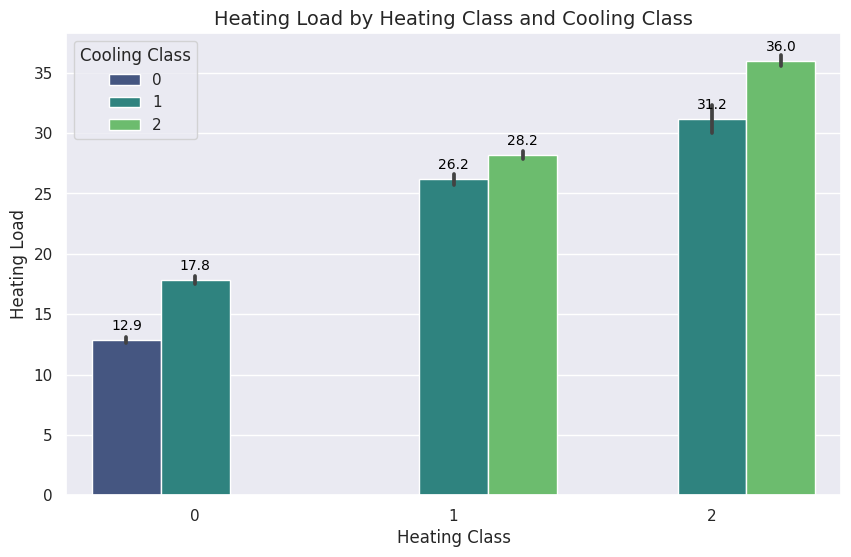

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(data=df, x="Heating_Class", y="Heating_Load", hue="Cooling_Class", palette="viridis")

# Adding values on top of each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.annotate(f'{height:.1f}', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Customizations
plt.title("Heating Load by Heating Class and Cooling Class", fontsize=14)
plt.xlabel("Heating Class")
plt.ylabel("Heating Load")
plt.legend(title="Cooling Class")
plt.show()


In [27]:
# Full data grouped only by Heating_Class
heating_summary = df.groupby('Heating_Class')['Heating_Load'].agg(['mean', 'max', 'min', 'count'])
print(heating_summary)

# Grouped by Heating_Class and Cooling_Class
avg_data = df.groupby(['Heating_Class', 'Cooling_Class'])[['Heating_Load']].mean().reset_index()
print(avg_data)


                    mean    max    min  count
Heating_Class                                
0              13.471940  19.95   6.01    397
1              26.823294  30.00  20.71    170
2              35.938358  43.10  30.05    201
   Heating_Class  Cooling_Class  Heating_Load
0              0              0     12.856034
1              0              1     17.846122
2              1              1     26.177826
3              1              2     28.172909
4              2              1     31.180000
5              2              2     35.986181



* As Heating_Class increases, the average Heating_Load increases significantly.

* For each Heating_Class, buildings in Cooling_Class 2 have higher average Heating_Load than those in Cooling_Class 1 or Cooling_Class 0.

* There’s a consistent trend where buildings with higher cooling loads (Cooling_Class 2) also tend to have higher heating loads.

* Patterns:

    * The relationship between heating and cooling classes suggests that buildings with higher energy requirements for heating often need more cooling, possibly due to inefficiencies in insulation or design


## Heating of Heating and Cooling Classes

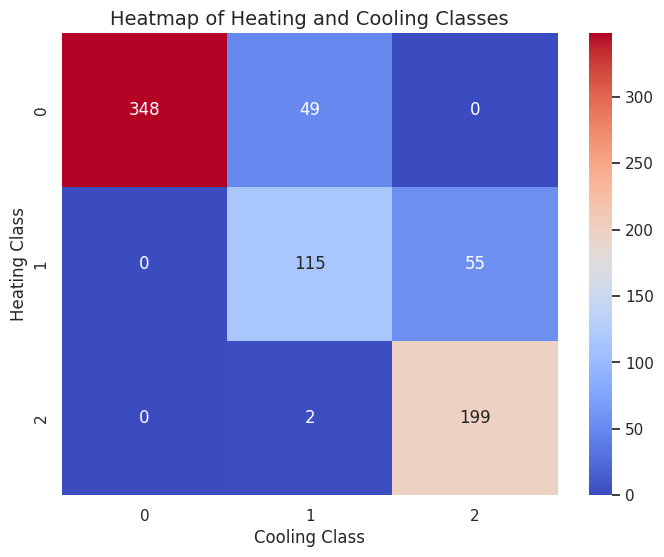

In [28]:
# Heatmap of Heating_Class and Cooling_Class distribution

heatmap_data = df.groupby(['Heating_Class', 'Cooling_Class']).size().unstack(fill_value=0)



plt.figure(figsize=(8, 6))

sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", cbar=True)

plt.title("Heatmap of Heating and Cooling Classes", fontsize=14)

plt.xlabel("Cooling Class")

plt.ylabel("Heating Class")

plt.show()

* Most buildings fall into the Heating_Class 0 and Cooling_Class 0 category, indicating a majority of energy-efficient buildings in the dataset.

* The second most frequent group is Heating_Class 2 and Cooling_Class 2, representing buildings with both high heating and cooling requirements.

* There is a small number of buildings in Heating_Class 1 with Cooling_Class 2.

* Patterns:

    * The heatmap confirms that energy efficiency (low heating and cooling classes) is prevalent in the dataset.

    * The data is highly concentrated along diagonal elements (Heating_Class aligns with Cooling_Class), reinforcing the correlation between the two.

## Checking Correlation between other features

<Axes: >

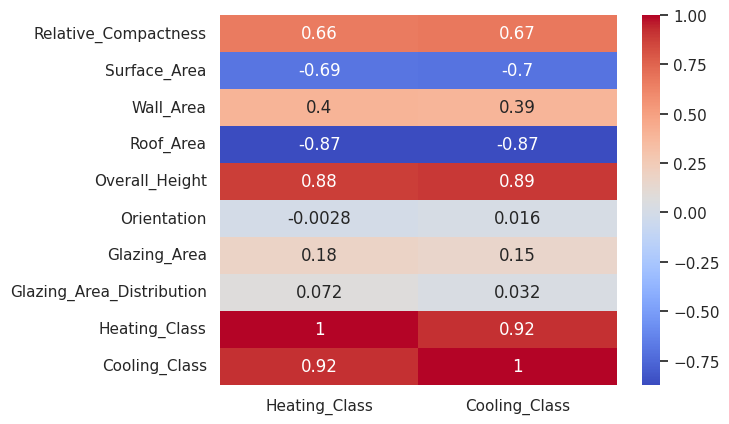

In [29]:
import matplotlib.pyplot as plt

import seaborn as sns

correlation = df.drop(columns=['Heating_Load', 'Cooling_Load']).corr()[['Heating_Class', 'Cooling_Class']]

sns.heatmap(correlation, annot=True, cmap='coolwarm')

* **Glazing_Area** and **Glazing_Area_Distribution** show weak correlations with both Heating_Class and Cooling_Class.These features seem to have minimal influence compared to others.

* **Overall_Height **(0.89) and **Relative_Compactness** (0.67) are also strongly positively correlated with **cooling_class**.

* **Roof_Area** (-0.87) and **Surface_Area** (-0.70) are strongly negatively correlated with **Cooling_Class**

* **Glazing_Area** and **Glazing_Area_Distribution** show weak correlations with both **Heating_Class** and **Cooling_Class**. These features seem to have minimal influence compared to others.

* **Orientation** has negligible correlation with both **Heating_Class** (-0.0028) and **Cooling_Class** (0.016), suggesting it plays little role in determining heating or cooling efficiency.
  * **Glazing_Area****Glazing_Area_Distribution ** **Heating_Class****Cooling_Class***   \* **Overall_Height****Relative_Compactness****cooling_class*** **Roof_Area****Surface_Area ****Cooling_Class*** **Glazing_Area****Glazing_Area_Distribution****Heating_Class****Cooling_Class*** **Orientation****Heating_Class****Cooling_Class** 
* * 
****Glazing_Area********. 

                           Relative_Compactness  Surface_Area  Wall_Area  \
Relative_Compactness                       1.00         -0.99      -0.20   
Surface_Area                              -0.99          1.00       0.20   
Wall_Area                                 -0.20          0.20       1.00   
Roof_Area                                 -0.87          0.88      -0.29   
Overall_Height                             0.83         -0.86       0.28   
Orientation                                0.00         -0.00      -0.00   
Glazing_Area                              -0.00          0.00      -0.00   
Glazing_Area_Distribution                 -0.00          0.00       0.00   
Heating_Class                              0.66         -0.69       0.40   
Cooling_Class                              0.67         -0.70       0.39   

                           Roof_Area  Overall_Height  Orientation  \
Relative_Compactness           -0.87            0.83         0.00   
Surface_Area             

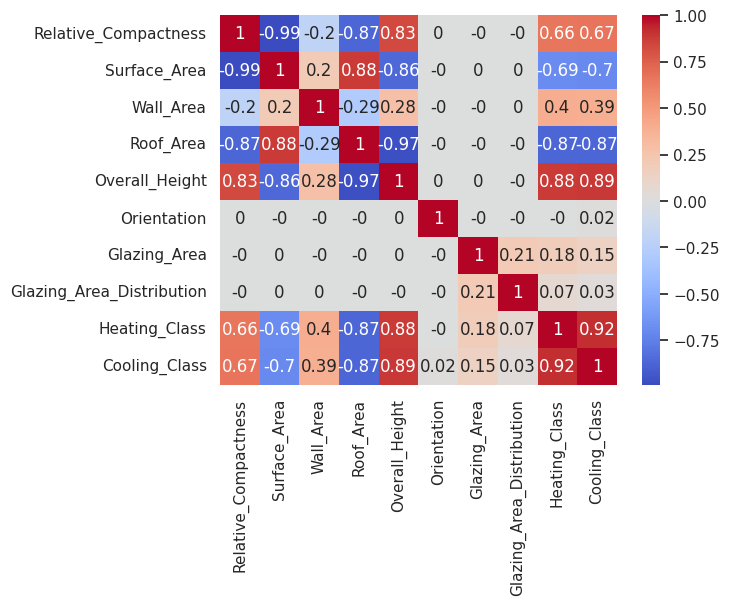

In [30]:
import matplotlib.pyplot as plt

import seaborn as sns

correlation = round(df.drop(columns=['Heating_Load', 'Cooling_Load']).corr(),2)

sns.heatmap(correlation, annot=True, cmap='coolwarm')

print(correlation)

In [31]:
import numpy as np  # Import NumPy

def filter_high_correlations(corr_matrix, threshold=0.80):
    """
    Returns feature pairs with correlation higher than the specified threshold.

    Parameters:
        corr_matrix (DataFrame): Correlation matrix.
        threshold (float): Absolute correlation threshold.

    Returns:
        DataFrame: Filtered correlation pairs.
    """
    # Mask diagonal elements (self-correlation)
    corr_matrix_filtered = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))

    # Find correlations greater than the threshold
    high_corr = corr_matrix_filtered.abs() > threshold

    # Get the feature pairs and their correlation values
    feature_pairs = (
        corr_matrix_filtered[high_corr]
        .stack()
        .reset_index()
        .rename(columns={0: "Correlation", "level_0": "Feature1", "level_1": "Feature2"})
    )

    # Drop duplicate pairs (Feature1, Feature2) vs (Feature2, Feature1)
    feature_pairs = feature_pairs.loc[feature_pairs["Feature1"] < feature_pairs["Feature2"]]

    return feature_pairs

# Generate correlation matrix
correlation = df.drop(columns=['Heating_Load', 'Cooling_Load']).corr()

# Call the function
high_corr_features = filter_high_correlations(correlation, threshold=0.80)

# Display high correlations
print(high_corr_features)


                Feature1              Feature2  Correlation
0   Relative_Compactness          Surface_Area    -0.991901
1   Relative_Compactness             Roof_Area    -0.868823
7              Roof_Area          Surface_Area     0.880720
11        Overall_Height  Relative_Compactness     0.827747
12        Overall_Height          Surface_Area    -0.858148
13        Overall_Height             Roof_Area    -0.972512
16         Heating_Class             Roof_Area    -0.868645
17         Heating_Class        Overall_Height     0.881725
19         Cooling_Class             Roof_Area    -0.872053
20         Cooling_Class        Overall_Height     0.893939
21         Cooling_Class         Heating_Class     0.919433


# Step-3 Data Preprocessing for MulitioutClassifier

## Train-test split

In [32]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.multioutput import MultiOutputClassifier

# Features and multi-output target

X = df[['Overall_Height', 'Roof_Area','Wall_Area',]]

y = df[['Heating_Class', 'Cooling_Class']]  # Multi-output target



# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
X_train.shape

(614, 3)

In [34]:
y_train.shape

(614, 2)

## Feature scaling

In [35]:
# Scale features

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Step-4 Meta Model Training and Evaluation 

## Support Vector Machines (SVM)

In [36]:
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC()

# Wrap SVM in MultiOutputClassifier

multi_output_model = MultiOutputClassifier(svm)

multi_output_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=SVC())

#### Why I Used MultiOutputClassifier?



* **SVM Handles Only Single Output:**

    * Standard Support Vector Machines (SVMs) are designed for single-output classification, meaning they can only predict one target variable at a time (e.g., Heating_Class or Cooling_Class).

    * Since your task requires predicting both Heating_Class and Cooling_Class simultaneously, you need a wrapper like MultiOutputClassifier.

      

* **Separate Models for Each Target:**

    * MultiOutputClassifier creates and trains a separate SVM model for each target variable (in this case, one for Heating_Class and another for Cooling_Class).

    * This approach allows each target to be modeled independently while still being trained in a unified framework.



* **Simplified Workflow:**

    * Using MultiOutputClassifier lets you work with a single fit() and predict() method to train and predict multiple outputs, instead of training multiple models manually.
odels manually.

In [37]:
from sklearn.metrics import accuracy_score, classification_report



# Make predictions

y_pred = multi_output_model.predict(X_test)



# Evaluate each output

for i, target in enumerate(['Heating_Class', 'Cooling_Class']):

    print(f"\nClassification Report for {target}:\n")

    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))

    

    print(f"Accuracy for {target}: {round(accuracy_score(y_test.iloc[:, i], y_pred[:, i]),2)}")



Classification Report for Heating_Class:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        75
           1       0.74      0.78      0.76        36
           2       0.80      0.81      0.80        43

    accuracy                           0.88       154
   macro avg       0.84      0.85      0.85       154
weighted avg       0.88      0.88      0.88       154

Accuracy for Heating_Class: 0.88

Classification Report for Cooling_Class:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        63
           1       0.52      0.32      0.40        37
           2       0.73      0.80      0.76        54

    accuracy                           0.77       154
   macro avg       0.71      0.71      0.70       154
weighted avg       0.74      0.77      0.74       154

Accuracy for Cooling_Class: 0.77


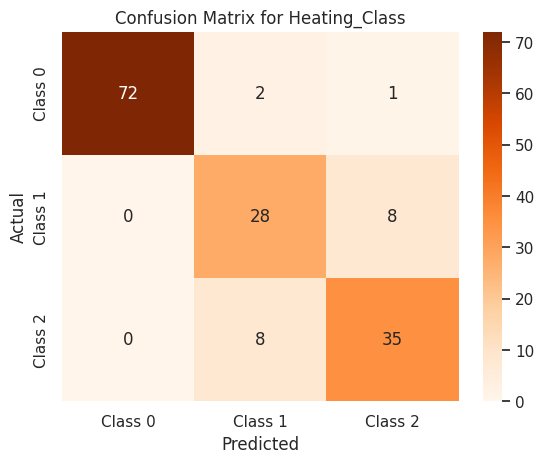

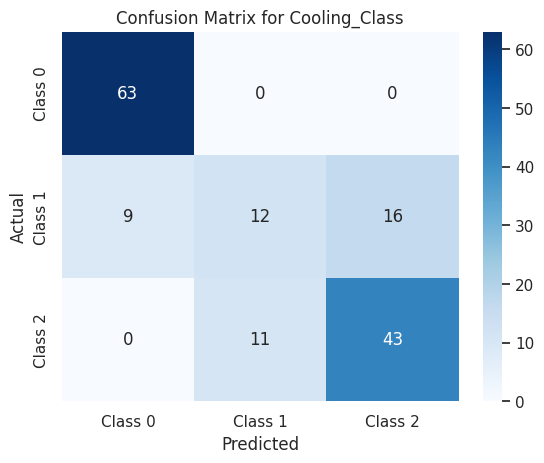

In [38]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

import matplotlib.pyplot as plt



# Plot confusion matrix for Heating_Class

cm_heating = confusion_matrix(y_test['Heating_Class'], y_pred[:, 0])

sns.heatmap(cm_heating, annot=True, fmt="d", cmap="Oranges", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])

plt.title("Confusion Matrix for Heating_Class")

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.show()



# Plot confusion matrix for Cooling_Class

cm_cooling = confusion_matrix(y_test['Cooling_Class'], y_pred[:, 1])

sns.heatmap(cm_cooling, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])

plt.title("Confusion Matrix for Cooling_Class")

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.show()


In [39]:
multi_output_model.get_params()

{'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'n_jobs': None}

## Meta Model training across diffrent models for Multioutput classification

In [40]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# Define different model

classifiers = {
    'Support Vector Machine': SVC(max_iter=10000),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=4),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'xG BOOST' : XGBClassifier()
}


In [41]:
for name, clf in classifiers.items():
    print(f"\nEvaluating {name}...")
    
    # Wrap the classifier with MultiOutputClassifier
    multi_output_clf = MultiOutputClassifier(clf)
    
    # Train the model
    multi_output_clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = multi_output_clf.predict(X_test)
    
    # Evaluate each output
    for i, target in enumerate(['Heating_Class', 'Cooling_Class']):
        print(f"\nClassification Report for {target} with {name}:\n")
        print(classification_report(y_test.iloc[:, i], y_pred[:, i]))
        print(f"Accuracy for {target} with {name}: {round(accuracy_score(y_test.iloc[:, i], y_pred[:, i]), 2)}")
        
        # Compute confusion matrix
        cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
        print(f"Confusion Matrix for {target} with {name}:\n{cm}")



Evaluating Support Vector Machine...

Classification Report for Heating_Class with Support Vector Machine:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        75
           1       0.74      0.78      0.76        36
           2       0.80      0.81      0.80        43

    accuracy                           0.88       154
   macro avg       0.84      0.85      0.85       154
weighted avg       0.88      0.88      0.88       154

Accuracy for Heating_Class with Support Vector Machine: 0.88
Confusion Matrix for Heating_Class with Support Vector Machine:
[[72  2  1]
 [ 0 28  8]
 [ 0  8 35]]

Classification Report for Cooling_Class with Support Vector Machine:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        63
           1       0.52      0.32      0.40        37
           2       0.73      0.80      0.76        54

    accuracy                           0.77       154
   ma

## Analysis of Model Performance

### Heating_Class Classification:

* Across all models, the accuracy for classifying Heating_Class is consistently 0.88. This suggests that the data is well-suited for these models.

* Precision, Recall, and F1-Score:
    * Class 0 has very high precision, recall, and F1-scores (~0.98), indicating it is well-classified by all models.
    * Class 1 and Class 2 have slightly lower precision and recall (~0.74–0.80), reflecting some confusion in the classification.

* Confusion Matrix Observations:
    * Misclassifications occur mainly between Class 1 and Class 2.
    * Few samples are misclassified as adjacent classes.

#### Insights:

* Models are equally effective for Heating_Class.
* Misclassifications may be due to overlapping features between Class 1 and Class 2.

### Cooling_Class Classification:

* The accuracy varies across models: 
    * Highest accuracy: 0.84 (Random Forest, Gradient Boosting, and xGBoost).
    * Lowest accuracy: 0.73 (Logistic Regression).
    * (KNN and SVM perform moderately well (~0.77–0.79).

* Precision, Recall, and F1-Score:
    * Class 0 is consistently well-classified (F1-scores ~0.93–0.97).
    * Class 1 shows the weakest performance (F1-scores ~0.16–0.68).
    * Class 2 has reasonably high precision and recall (~0.74–0.82).

* Confusion Matrix Observations:
    * Class 0: Dominates predictions and is rarely misclassified.
    * Class 1: Often confused with Class 2, particularly in Logistic Regression.
    * Class 2: Misclassifications occur but are less frequent.


#### Insights:

* Models with ensemble methods (Random Forest, Gradient Boosting, xGBoost) perform significantly better for Cooling_Class.
* Logistic Regression struggles with Class 1, likely due to its linear decision boundary.

### 